In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [47]:
N = np.array([500, 1000, 2000])
m = np.zeros([10, N.shape[0]])

In [48]:
for nn, n in enumerate(N):
    print("CANTIDAD DE NEURONAS:", n)
    p = np.arange(int(n/50), int(n/5)+1, int(n/50))
    for x,y in enumerate(p):
        patrones = np.random.choice([1, -1], size=[y,n])
        w = np.zeros((n, n))
        for p_i in range(y):
            w += np.dot(patrones[p_i].reshape(-1,1),np.transpose(patrones[p_i].reshape(-1,1)))
        np.fill_diagonal(w,0)
        w /= n

        j = 0
        j_lim = 100
        r_aux = np.copy(patrones)
        while (j<j_lim):
            reconstruido = np.sign(np.dot(r_aux,w))
            reconstruido = np.where(reconstruido==0, 1, reconstruido)
            if (reconstruido==r_aux).all():
                print("La iteración {} convergió con {} iteraciones. ".format(x, j+1), end='')
                break
            else:
                r_aux = np.copy(reconstruido)
                j += 1

        if j==j_lim:
            print("La iteración {} no convergió. ".format(x), end='')

        m[x, nn] = 0
        for k in range(y):    
            m[x, nn] += np.dot(patrones[k], reconstruido[k].T)
        m[x, nn] = m[x, nn] / (n * y)
        print("El <m> para {} patrones es {}.".format(y, m[x, nn]))

{} CANTIDAD DE NEURONAS: 500
La iteración 0 convergió con 1 iteraciones. El <m> para 10 patrones es 1.0.
La iteración 1 convergió con 1 iteraciones. El <m> para 20 patrones es 1.0.
La iteración 2 convergió con 1 iteraciones. El <m> para 30 patrones es 1.0.
La iteración 3 convergió con 2 iteraciones. El <m> para 40 patrones es 0.9999.
La iteración 4 convergió con 3 iteraciones. El <m> para 50 patrones es 0.9984.
La iteración 5 convergió con 38 iteraciones. El <m> para 60 patrones es 0.9773333333333334.
La iteración 6 convergió con 40 iteraciones. El <m> para 70 patrones es 0.9641142857142857.
La iteración 7 no convergió. El <m> para 80 patrones es 0.86705.
La iteración 8 no convergió. El <m> para 90 patrones es 0.6144444444444445.
La iteración 9 no convergió. El <m> para 100 patrones es 0.5896.
{} CANTIDAD DE NEURONAS: 1000
La iteración 0 convergió con 1 iteraciones. El <m> para 20 patrones es 1.0.
La iteración 1 convergió con 1 iteraciones. El <m> para 40 patrones es 1.0.
La iteración 

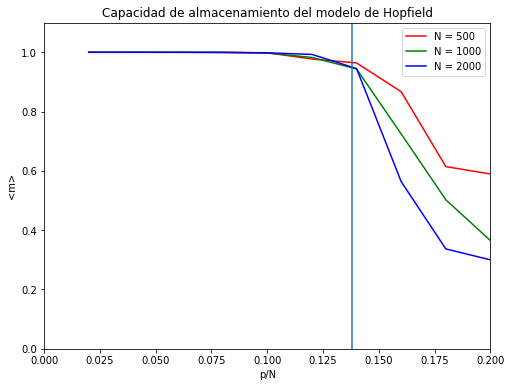

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(p/(4 * N[0]), m[:, 0], color='red', label='N = 500')
plt.plot(p/(2 * N[1]), m[:, 1], color='green', label='N = 1000')
plt.plot(p/(1 * N[2]), m[:, 2], color='blue', label='N = 2000')
plt.axvline(0.138)
plt.xlim(0, 0.2)
plt.ylim(0, 1.1)
plt.xlabel('p/N')
plt.ylabel('<m>')
plt.legend()
plt.title('Capacidad de almacenamiento del modelo de Hopfield')
plt.show()